# Zadanie 5 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [1]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

# Zadanie 5
Generator pseudolosowego zbioru danych na podstawie wielowymiarowego rozkładu
normalnego z zadawaną strukturą macierzy kowariancji

### Funkcja do generowania zbioru danych na podstawie wielowymiarowego rozkładu normalnego

In [2]:
def generate_dataset_norm(N):
    return np.column_stack((np.random.normal(0, 0.3, N), np.random.normal(0, 0.3, N)))

### Funkcja do generowania zbioru danych wybierając dane z przedziału (0,1)
Wychodzi zbiór który na wykresie przyjmuje formę kwadratu

In [3]:
def generate_dataset_rand(N):
    dataset = []
    for _ in range(N):
        dataset.append([random.random(), random.random()])
        
    return dataset

### Funkcja do rotacji zbiorem danych na podstawie podanego kątu

In [4]:
def rotate(phi):
    rad = np.radians(phi)
    rotation_arr = np.array([[np.cos(rad), np.sin(rad)],
                             [-np.sin(rad), np.cos(rad)]])
    return rotation_arr

### Funkcja do rozciągania zbioru danych

In [5]:
def stretch(x, y):
    stretch_arr = np.array([[x, 0],
                            [0, y]])
    return stretch_arr

### Funkcja do transformacji zbioru danych

In [18]:
def perform_transformation(dataset, rotation_angle, x, y):
    result_dataset = copy.deepcopy(dataset)
    
    stretching = stretch(x, y)
    result_dataset = np.dot(result_dataset, stretching)
    
    rotation = rotate(rotation_angle)
    result_dataset = np.dot(result_dataset, rotation)
    
    return result_dataset

### Przypadek dla zbioru danych do testowania funkcji wybierając dane z przedziału (0,1) przy generowaniu dla osi pionowej i poziomej.

In [19]:
dataset = np.array(generate_dataset_rand(500))

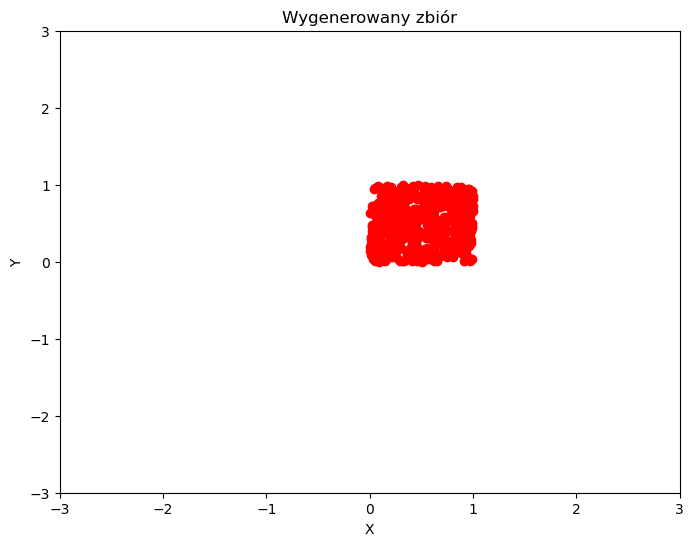

In [20]:
plt.figure(figsize=(8, 6))

plt.scatter(dataset[:,[0]], dataset[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.title('Wygenerowany zbiór')
plt.show()

### Test funkcji obrotu - Obrót o 45 stopni

In [21]:
ang45 = rotate(45)
ang45

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [22]:
dataset_ang45 = np.dot(dataset, ang45)

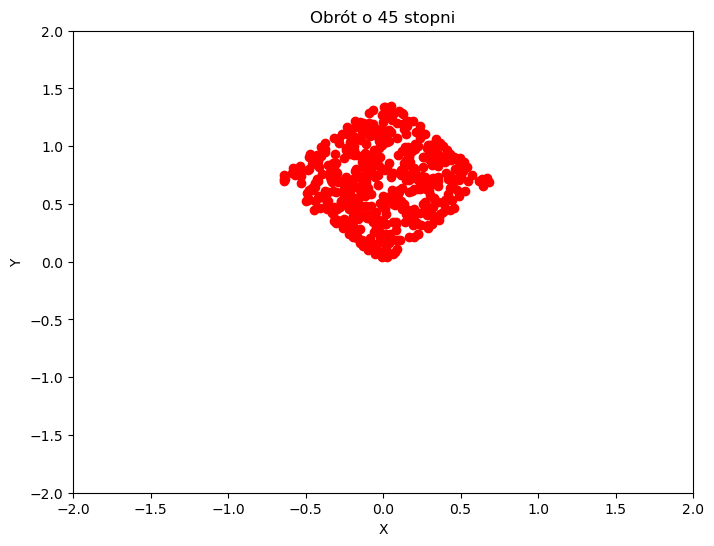

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(dataset_ang45[:,[0]], dataset_ang45[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.title('Obrót o 45 stopni')
plt.show()

### Test funkcji rozciągania - rozciągnięcie względem osi X pięciokrotnie i względem oni Y dwukrotnie

In [24]:
str5_2 = stretch(5, 2)
str5_2

array([[5, 0],
       [0, 2]])

In [25]:
dataset_str5_2 = np.dot(dataset, str5_2)

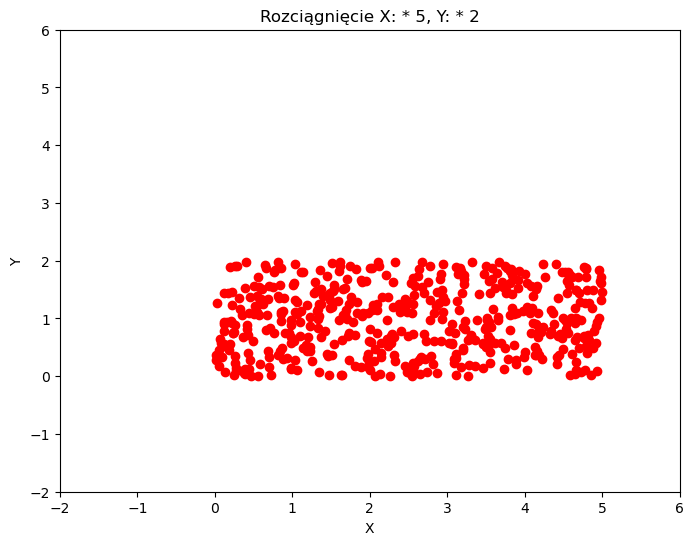

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(dataset_str5_2[:,[0]], dataset_str5_2[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-2, 6)
plt.ylim(-2, 6)

plt.title('Rozciągnięcie X: * 5, Y: * 2')
plt.show()

### Test funkcji pełnej transformacji obrót o 120 stopni, rozciągnięcie X: * 10, Y * 3

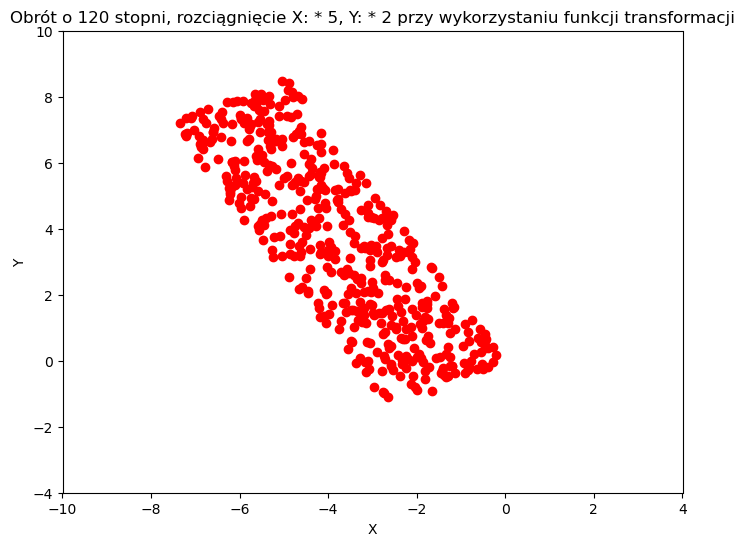

In [31]:
dataset_ang120_10_3 = perform_transformation(dataset, 120, 10, 3)

plt.figure(figsize=(8, 6))

plt.scatter(dataset_ang120_10_3[:,[0]], dataset_ang120_10_3[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-10, 4)
plt.ylim(-4, 10)

plt.title('Obrót o 120 stopni, rozciągnięcie X: * 5, Y: * 2 przy wykorzystaniu funkcji transformacji')
plt.show()

### Testy na wygenerowanym zbiorze danych na podstawie wielowymiarowego rozkładu normalnego

In [32]:
dataset = np.array(generate_dataset_norm(500))

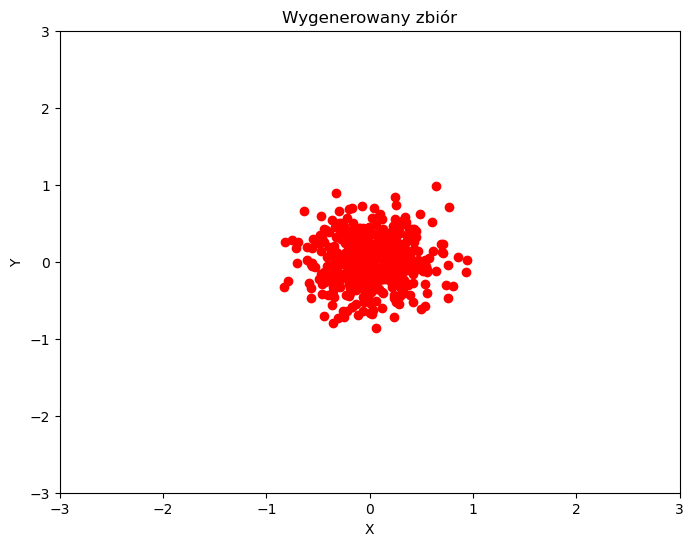

In [33]:
plt.figure(figsize=(8, 6))

plt.scatter(dataset[:,[0]], dataset[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.title('Wygenerowany zbiór')
plt.show()

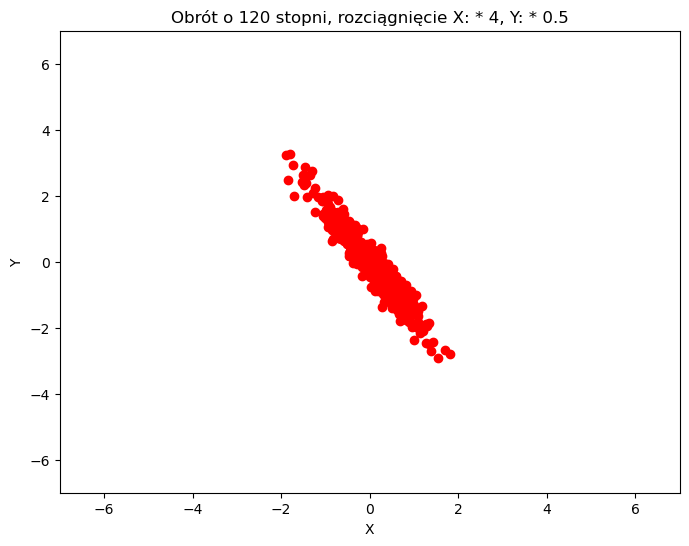

In [48]:
dataset_120_4_05 = perform_transformation(dataset, 120, 4, 0.5)

plt.figure(figsize=(8, 6))

plt.scatter(dataset_120_4_05[:,[0]], dataset_120_4_05[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-7, 7)
plt.ylim(-7, 7)

plt.title('Obrót o 120 stopni, rozciągnięcie X: * 4, Y: * 0.5')
plt.show()

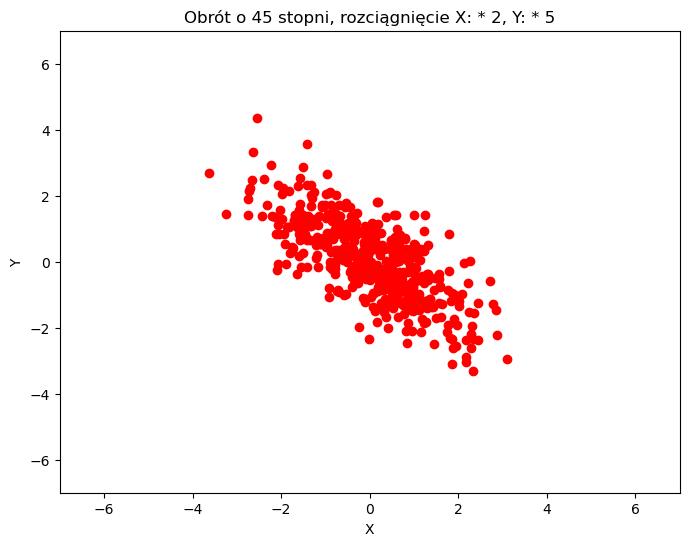

In [49]:
dataset_45_2_5 = perform_transformation(dataset, 45, 2, 5)

plt.figure(figsize=(8, 6))

plt.scatter(dataset_45_2_5[:,[0]], dataset_45_2_5[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-7, 7)
plt.ylim(-7, 7)

plt.title('Obrót o 45 stopni, rozciągnięcie X: * 2, Y: * 5')
plt.show()

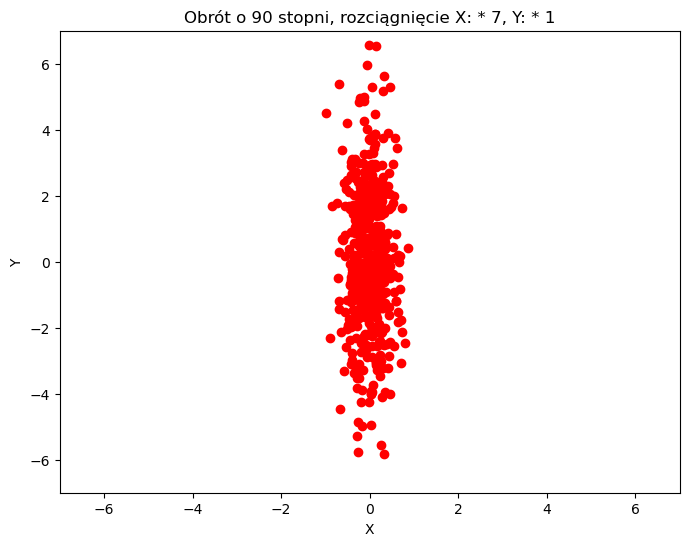

In [50]:
dataset_90_7_1 = perform_transformation(dataset, 90, 7, 1)

plt.figure(figsize=(8, 6))

plt.scatter(dataset_90_7_1[:,[0]], dataset_90_7_1[:,[1]], color='red', marker='o')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-7, 7)
plt.ylim(-7, 7)

plt.title('Obrót o 90 stopni, rozciągnięcie X: * 7, Y: * 1')
plt.show()

### Wnioski

Powyższe testy i zastosowane przykłady pokazują poprawność implementacji operacji transformacji (obrót i rozciąganie) zbioru danych.